In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Загрузка датасета
PATH = "glasses_filtered"

# Пути к данным
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [2]:
# Параметры
BATCH_SIZE = 32
IMG_SIZE = (250, 250)

# Генераторы для тренировочных и валидационных данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Бинарная классификация: кошки (0) vs собаки (1)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1708 images belonging to 2 classes.
Found 1153 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [5]:
EPOCHS = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
47/53 [=========================>....] - ETA: 10s - loss: 0.5731 - accuracy: 0.7062

C:\Users\NikaR\AppData\Roaming\Python\Python311\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


53/53 [==============================] - 113s 2s/step - loss: 0.5493 - accuracy: 0.7214 - val_loss: 0.2494 - val_accuracy: 0.8906
Epoch 2/10
53/53 [==============================] - 112s 2s/step - loss: 0.3937 - accuracy: 0.8192 - val_loss: 1.0374 - val_accuracy: 0.6033
Epoch 3/10
53/53 [==============================] - 105s 2s/step - loss: 0.2861 - accuracy: 0.8717 - val_loss: 0.3174 - val_accuracy: 0.8845
Epoch 4/10
53/53 [==============================] - 128s 2s/step - loss: 0.2478 - accuracy: 0.8998 - val_loss: 0.1439 - val_accuracy: 0.9661
Epoch 5/10
53/53 [==============================] - 113s 2s/step - loss: 0.1967 - accuracy: 0.9350 - val_loss: 0.2282 - val_accuracy: 0.9679
Epoch 6/10
53/53 [==============================] - 112s 2s/step - loss: 0.1696 - accuracy: 0.9397 - val_loss: 0.1983 - val_accuracy: 0.9236
Epoch 7/10
53/53 [==============================] - 118s 2s/step - loss: 0.1500 - accuracy: 0.9403 - val_loss: 0.1277 - val_accuracy: 0.9557
Epoch 8/10
53/53 [======

In [9]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

37/37 [==============================] - 13s 337ms/step - loss: 0.0773 - accuracy: 0.9835
Validation Accuracy: 98.35%


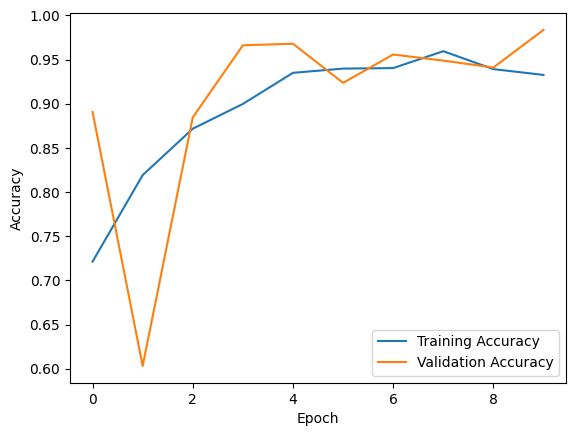

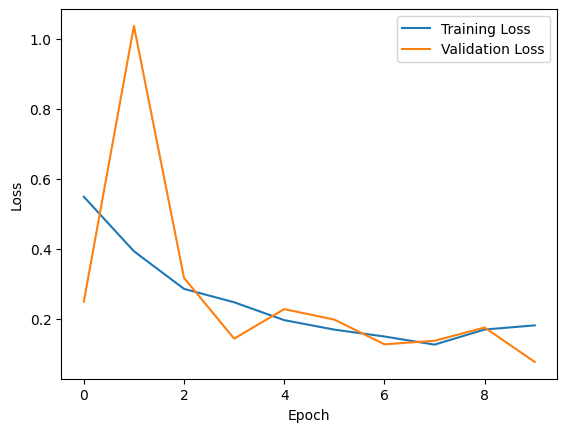

In [7]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Загрузка изображения
# img_path = 'glasses.webp'
img_path = 'p.jpeg'
# img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
print(f"Минимальное значение пикселя: {np.min(img_array)}")
print(f"Максимальное значение пикселя: {np.max(img_array)}")

# Предсказание
prediction = model.predict(img_array)
probability_non_glasses = prediction[0][0]  # Вероятность принадлежности к классу "не очки"
probability_glasses = 1 - probability_non_glasses  # Вероятность принадлежности к классу "очки"
print(prediction)
print(f"Вероятность класса 'очки': {probability_glasses:.4f}")
print(f"Вероятность класса 'не очки': {probability_non_glasses:.4f}")
if probability_glasses > 0.5:
    print("Это очки!")
else:
    print("Это не очки")

(1, 250, 250, 3)
Минимальное значение пикселя: 0.0
Максимальное значение пикселя: 1.0
1/1 [==============================] - 0s 29ms/step
7.258582627400756e-06
Вероятность класса 'очки': 1.0000
Вероятность класса 'не очки': 0.0000
Это очки!
